In [1]:
import os
import pyaudio as pyaudio
import torch

import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().run_line_magic('matplotlib', 'inline')
#All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import numpy as np
import librosa.feature as feature
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, LSTM, TimeDistributed, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import confusion_matrix

import seaborn as sns

import sys
#for  live speech 
import sounddevice as sd
from sklearn.neural_network import MLPClassifier
import joblib

import soundfile as soundfile
from sklearn.metrics import f1_score


In [2]:
path='D:\\GP2(SER)\\speech-emotion-recognition-ravdess-data\\'



In [3]:
def load_data(path):
        
    f_emotions=[]
    f_pathes=[]
    folders=os.listdir(path)
    for folder in folders:
        files=os.listdir(path+folder)
        for file in files:
            step=file.split('.')[0]
            step=step.split('-')[2]
            f_emotions.append(int(step))
            f_pathes.append(path+folder+os.sep+file)
    return [f_emotions,f_pathes]



def predict_emotion(audio_path):
    #... your existing code ...

    if __name__ == '__main__':
        if len(sys.argv) != 2:
            print("Usage: python SER.ipynb 'D:\\GP2(SER)\\03-01-02-01-01-01-01.wav'")
            sys.exit(1)
        audio_file_path = sys.argv[1]
        result = predict_emotion(audio_file_path)
        sys.stdout.flush()
        print(result)


def get_emotion(number):

    info={1 : 'neutral',
               2 : 'calm',
               3 : 'happy',
               4 : 'sad',
               5 : 'angry',
               6 : 'fearful',
               7 : 'disgust',
               8 : 'surprised'}
    return info[number]
              
        
    

emotions,pathes=load_data(path)



In [4]:
def read_audio(path):
    data,sample_rate=librosa.load(path,duration=2.4,offset=0.6)
    return data,sample_rate
    
def draw_wave(path, data, sr):
    plt.figure(figsize=(9,4))
    #data,sr=librosa.load(path)
    plt.title('Audio Wave ::'+path,size=17)
    disp.waveshow(data, sr=sr, color="blue")
    plt.show()

def draw_spectrogram(path,data,sr):
    plt.figure(figsize=(9,4))
    #data,sr=librosa.load(path)
    X=librosa.stft(data)
    Xdb= librosa.amplitude_to_db(abs(X))
    plt.title('Spectogram for Wave ::'+path,size=17)
    disp.specshow(Xdb, sr=sr, x_axis='time',y_axis='log')
    plt.show()

def add_noise(data,sr):
    noise=0.035*np.random.uniform()*np.amax(data)
    data+=noise*np.random.normal(size=data.shape[0])
    return data,sr

def shift(data,sr):
    shift_range=int(np.random.uniform(low=-5,high=5)*1000)
    shifted=np.roll(data,shift_range)
    return shifted,sr

def pitch(data,sr,factor=0.7):
    factor=0.7
    pitched=librosa.effects.pitch_shift(y=data,sr=sr,n_steps=factor)
    return pitched,sr

def stretch(data,sr,rate=0.85):
    #the bigger the number the shorter is the time
    stretched=librosa.effects.time_stretch(y=data,rate=rate)
    return stretched,sr
    
# feature extraction MFCC

def feature_extraction(data,sr):
    mfcc=feature.mfcc(y=data, sr=sr)
    return mfcc

def processing_audio(data,sr,options):
    func=random.choice(options)
    if func=='Standard':
        processed=data
    else:
        processed, _=func(data,sr)
    return processed
    


# Emotions in the RAVDESS dataset

20
calm


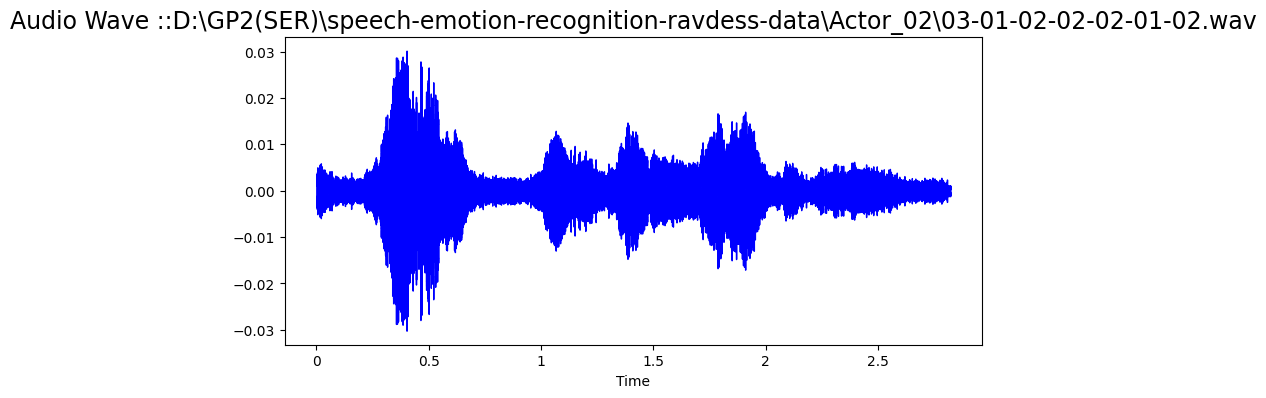

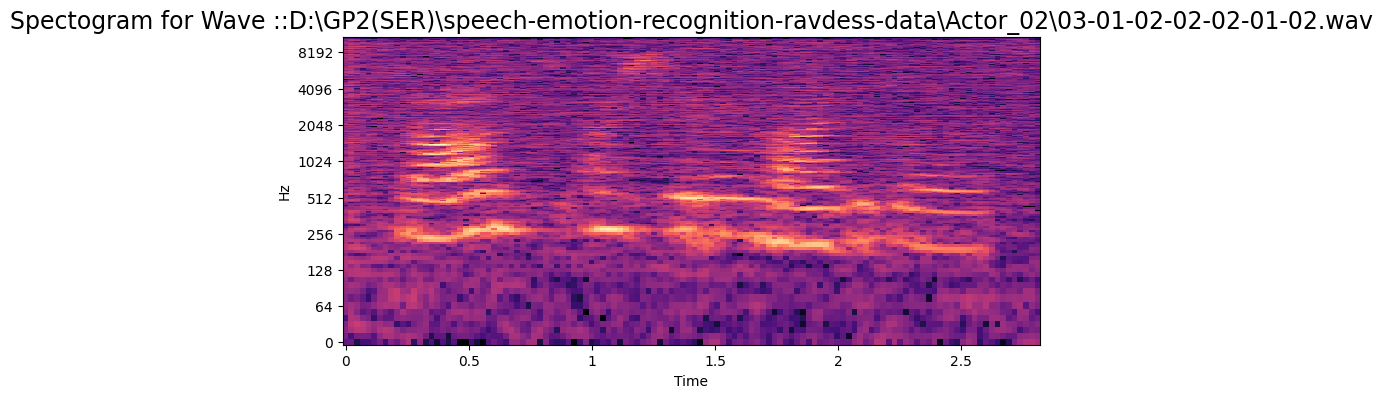

In [8]:
def get_features(path):
    data,sample_rate=read_audio(path)
    funcs=['Standard',add_noise,pitch]
    features=[]
    func1_data=processing_audio(data,sample_rate,funcs)
    func2_data=processing_audio(func1_data,sample_rate,funcs)
    feature=feature_extraction(func2_data,sample_rate)
 
    if feature.shape == (20,104):
        features.append(feature)
        
    func1_data=processing_audio(data,sample_rate,funcs)
    func2_data=processing_audio(func1_data,sample_rate,funcs)
    feature=feature_extraction(func2_data,sample_rate)
    if feature.shape == (20,104):
        features.append(feature)
        
    func1_data=processing_audio(data,sample_rate,funcs)
    func2_data=processing_audio(func1_data,sample_rate,funcs)
    feature=feature_extraction(func2_data,sample_rate)
    
    if feature.shape == (20,104):
        features.append(feature)
    return features

  








def display(number):
    
    data, sample_rate= read_audio(pathes[number])
    mfcc_features= feature_extraction(data,sample_rate)
    print(len(mfcc_features))
    print(get_emotion(emotions[number]))
    data, sample_rate=add_noise( data, sample_rate)
    data, sample_rate=shift( data, sample_rate)
    data, sample_rate=pitch( data, sample_rate)
    data, sample_rate=stretch( data, sample_rate)
    draw_wave(pathes[number],  data, sample_rate)
    draw_spectrogram(pathes[number], data, sample_rate)

    return data, sample_rate



d,sr=display(70)    
Audio(data=d,rate=sr)




In [39]:
#this take a while to run DONT RUN IT
X=[]
Y=[]
for indx in range(len(pathes)):
    value=get_features(pathes[indx])
    if value !=[]:
        for item in value:
            X.append(item)
            Y.append(np.eye(8)[emotions[indx]-1])

In [36]:
#1,n_classes=8
#0,7
#np.eye(8)[index-1]
#converted into a form that could be provided to machine learning algorithms to improve prediction performance.
encoder=OneHotEncoder()
encoder.fit_transform(np.array([1,2,3,4,1,5,6,7,8]).reshape(-1,1)).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [40]:

x_train,x_test,y_train,y_test=train_test_split(np.array(X),np.array(Y),test_size=0.2,random_state=11,shuffle=True)
print('train X shape',x_train.shape)
print('test X shape',x_test.shape)
print('test Y shape',y_test.shape)
print('train Y shape',y_train.shape)


train X shape (3739, 20, 104)
test X shape (935, 20, 104)
test Y shape (935, 8)
train Y shape (3739, 8)


In [41]:
trainX=np.expand_dims(x_train,axis=3)
trainX=np.expand_dims(trainX,axis=3)
trainX=np.swapaxes(trainX,1,2)
print('trainX:', trainX.shape)

testX=np.expand_dims(x_test,axis=3)
testX=np.expand_dims(testX,axis=3)
testX=np.swapaxes(testX,1,2)
print('testX:', testX.shape)

inputShape=trainX.shape[1:]
inputShape

trainX: (3739, 104, 20, 1, 1)
testX: (935, 104, 20, 1, 1)


(104, 20, 1, 1)

In [42]:
#CNN
def createModel(inputShape):
    model=Sequential()
    model.add(TimeDistributed(Conv1D(32,3,padding='same',activation='relu'),input_shape=inputShape))
    #reduce overfitting.
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=64,activation='relu'))

    model.add(Dense(units=8,activation='softmax'))
    
    return model

    

In [43]:
model=createModel(inputShape)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDi  (None, 104, 20, 1, 32)    128       
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 104, 20, 1, 32)    128       
 stributed)                                                      
                                                                 
 time_distributed_5 (TimeDi  (None, 104, 640)          0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 64)                180480    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

Training the model:

In [15]:
opt=Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',
              metrics=['accuracy'])
reduce=ReduceLROnPlateau(monitor='val_loss',factor=0.6,verbose=1,patience=50,min_lr=1e-8)
#1e-8=0.0000000|01
stop=EarlyStopping(monitor='val_loss',patience=50)


hist=model.fit(trainX,y_train,batch_size=140,epochs=2000,validation_data=(testX,y_test),callbacks=[reduce, stop])

Epoch 1/2000


27/27 [==============================] - 26s 668ms/step - loss: 2.0342 - accuracy: 0.1744 - val_loss: 2.0172 - val_accuracy: 0.1433 - lr: 0.0100
Epoch 2/2000
27/27 [==============================] - 17s 647ms/step - loss: 1.8678 - accuracy: 0.2578 - val_loss: 1.7947 - val_accuracy: 0.2877 - lr: 0.0100
Epoch 3/2000
27/27 [==============================] - 15s 544ms/step - loss: 1.7872 - accuracy: 0.3062 - val_loss: 1.8152 - val_accuracy: 0.2909 - lr: 0.0100
Epoch 4/2000
27/27 [==============================] - 15s 543ms/step - loss: 1.7176 - accuracy: 0.3362 - val_loss: 1.7191 - val_accuracy: 0.3187 - lr: 0.0100
Epoch 5/2000
27/27 [==============================] - 15s 569ms/step - loss: 1.6827 - accuracy: 0.3485 - val_loss: 1.6951 - val_accuracy: 0.3390 - lr: 0.0100
Epoch 6/2000
27/27 [==============================] - 16s 592ms/step - loss: 1.6373 - accuracy: 0.3578 - val_loss: 1.5926 - val_accuracy: 0.3882 - lr: 0.0100
Epoch 7/2000
27/27 [==============================

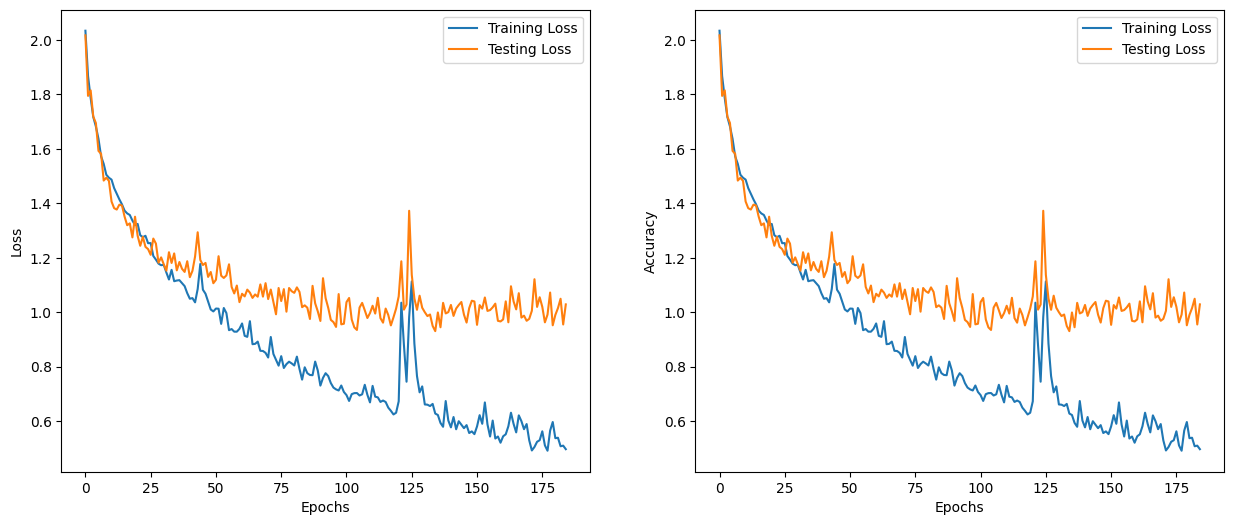

In [20]:
#print('The accuracy: ',model.evaluate (testX,y_test)[1]*100, '%')
train_loss=hist.history['loss']
test_loss=hist.history['val_loss']
train_accuracy=hist.history['accuracy']
train_accuracy=hist.history['val_accuracy']



epochs= [value for value in range (185)]
fig, ax = plt.subplots(1,2)
fig.set_size_inches (15,6)
ax[0].plot(epochs, train_loss, label='Training Loss') 
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Testing & Training Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, label='Training Loss) 
ax[1].plot (epochs, test_loss, label='Testing Loss')
ax[1].set_title('Testing & Training Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

model.save('D:\\GP2(SER)\\speech-emotion-recognition-ravdess-data\\emotion_model_newest_epochs.h5')

Testing


In [44]:
emotion_model=load_model('emotion_model_eighty_three_epochs.h5')
print('The accuracy: ',emotion_model.evaluate (testX,y_test)[1]*100, '%')

y_pred=emotion_model.predict(testX)

30/30 [==============================] - 5s 71ms/step - loss: 0.5372 - accuracy: 0.8503
The accuracy:  85.02673506736755 %
30/30 [==============================] - 4s 62ms/step


In [45]:
predY=encoder.inverse_transform(y_pred)
testY=encoder.inverse_transform(y_test)


emotion_predict=[get_emotion(value) for value in predY.flatten()]
emotion_actual=[get_emotion(value) for value in testY.flatten()]


#df= data frame
df=pd.DataFrame(columns=['Actual Emtions','predicted Emtions'])

df['Actual Emtions']=emotion_actual
df['predicted Emtions']=emotion_predict

df.head(15)

,Actual Emtions,predicted Emtions
0,calm,calm
1,sad,sad
2,surprised,sad
3,fearful,fearful
4,disgust,angry
5,sad,sad
6,surprised,surprised
7,calm,calm
8,sad,sad
9,sad,calm


Text(70.72222222222221, 0.5, 'Actual Emotions')

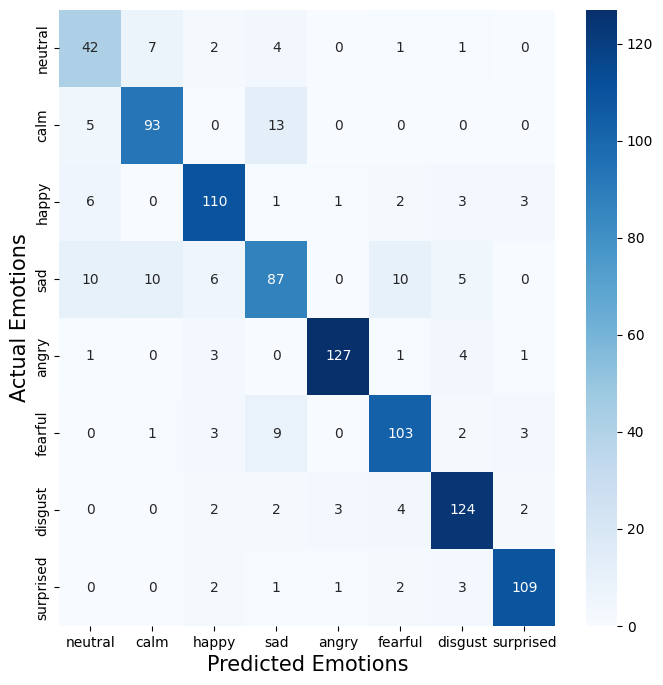

In [46]:
cm = confusion_matrix (testY, predY)
emts = [get_emotion(em) for em in encoder.categories_[0]]
cmt = pd.DataFrame(cm, index= emts, columns = emts)
plt. figure (figsize=(8,8))
sns.heatmap(cmt, annot=True,  fmt='', cmap= 'Blues')

plt.xlabel('Predicted Emotions', size=15) 
plt.ylabel('Actual Emotions', size=15) 


In [25]:
#RECORDED USING MICROPHONE:
import pyaudio as pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [51]:
from transformers import Wav2Vec2FeatureExtractor, AutoModelForAudioClassification
import soundfile as sf

# Load the feature extractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")


model = AutoModelForAudioClassification.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")


audio_input, sampling_rate = sf.read("output10_resampled.wav")


inputs = feature_extractor(audio_input, sampling_rate=sampling_rate, return_tensors="pt", padding=True)


with torch.no_grad():
    logits = model(inputs.input_values).logits


probs = torch.nn.functional.softmax(logits, dim=-1)


predicted_emotion = probs.argmax().item()


Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-e

In [52]:
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
      X = sound_file.read(dtype="float32")
      sample_rate=sound_file.samplerate
      if chroma:
         stft = np.abs(librosa.stft(X, dtype=np.float32))
      result=np.array([])
      if mfcc:
          mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
          mfccs = mfccs.astype(np.float32)
          if result.ndim == 1:
              result = result.reshape(1, -1)
              mfccs = mfccs.reshape(1, -1)

          result=np.hstack((result, mfccs))
      if chroma:
          chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
          chroma = mfccs.astype(np.float32)
          chroma = chroma.reshape(1, -1)
          result=np.hstack((result, chroma))
      if mel:
          mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
          mel = mel.reshape(1, -1)
          result=np.hstack((result, mel))
  return result


In [53]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = 'output10_resampled.wav'

# data , sr = librosa.load(file)
# data = np.array(data)
ans =[]



new_feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
#print(ans)
# data.shape
ans = ans.reshape(104, -1, 1, 1)
# Get predictions
with torch.no_grad():
   logits = model(inputs.input_values).logits

probabilities = torch.nn.functional.softmax(logits, dim=-1)

class_names = ["neutral", "calm", "happy", "sad","angry","fearful","disgust","surprised"] 
_, predicted_class = torch.max(probabilities, dim=-1)
predicted_class = predicted_class.item() # Ensure it's an integer

if predicted_class < len(class_names):
   predicted_emotion = class_names[predicted_class]
   print(f"Predicted emotion: {predicted_emotion}")
else:
   print(f"Invalid predicted class: {predicted_class}")





C:\Users\Huawei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:362: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_matrix[..., :off_start] = fft.rfft(fft_window * y_frames_pre, axis=-2)
C:\Users\Huawei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_matrix[..., -off_end:] = fft.rfft(fft_window * y_frames_post, axis=-2)
C:\Users\Huawei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:378: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_matrix[..., bl_s + off_start : bl_t + off_start] = fft.rfft(


Predicted emotion: neutral
